<a href="https://colab.research.google.com/github/brhema2704/CODSOFT/blob/main/Task_1_Movie_Genre_classification/Movie_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MOVIE GENRE CLASSIFICATION

Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Upload and Extract ZIP File in Colab

In [ ]:
from google.colab import files
import zipfile
import os

# Upload the zip
uploaded = files.upload()

# Extract the uploaded ZIP
zip_path = "archive (2).zip"
extract_dir = "movie_genre_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

os.listdir(os.path.join(extract_dir, 'Genre Classification Dataset'))


Saving archive (2).zip to archive (2) (1).zip


['description.txt',
 'test_data.txt',
 'test_data_solution.txt',
 'train_data.txt']

Load Dataset

In [ ]:
def load_dataset(path):
    data = []
    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split(" ::: ")
            if len(parts) == 4:
                data.append({
                    "id": parts[0],
                    "title": parts[1],
                    "genre": parts[2],
                    "description": parts[3]
                })
    return pd.DataFrame(data)

train_path = "/content/movie_genre_data/Genre Classification Dataset/train_data.txt"
df = load_dataset(train_path)


Data Overview

In [ ]:
print("Total samples:", len(df))
print(df['genre'].value_counts())  # Optional: Class distribution


Total samples: 54214
genre
drama          13613
documentary    13096
comedy          7447
short           5073
horror          2204
thriller        1591
action          1315
western         1032
reality-tv       884
family           784
adventure        775
music            731
romance          672
sci-fi           647
adult            590
crime            505
animation        498
sport            432
talk-show        391
fantasy          323
mystery          319
musical          277
biography        265
history          243
game-show        194
news             181
war              132
Name: count, dtype: int64


Text Preprocessing

In [ ]:
X = df['description']
y = df['genre']


Split into Training and Validation


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


TF-IDF Vectorization


In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)


Model Training

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

Model Evaluation

In [ ]:
y_pred = model.predict(X_val_tfidf)

print("\n Accuracy:", accuracy_score(y_val, y_pred))
print("\n Classification Report:\n", classification_report(y_val, y_pred))



 Accuracy: 0.5792677303329337

 Classification Report:
               precision    recall  f1-score   support

      action       0.48      0.25      0.33       263
       adult       0.77      0.31      0.44       118
   adventure       0.59      0.11      0.18       155
   animation       0.62      0.08      0.14       100
   biography       0.00      0.00      0.00        53
      comedy       0.52      0.60      0.56      1490
       crime       0.20      0.01      0.02       101
 documentary       0.66      0.85      0.75      2619
       drama       0.54      0.76      0.63      2723
      family       0.55      0.11      0.18       157
     fantasy       0.00      0.00      0.00        65
   game-show       1.00      0.41      0.58        39
     history       0.00      0.00      0.00        49
      horror       0.65      0.55      0.59       441
       music       0.67      0.38      0.48       146
     musical       1.00      0.02      0.04        55
     mystery       0.50 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix for Visualization

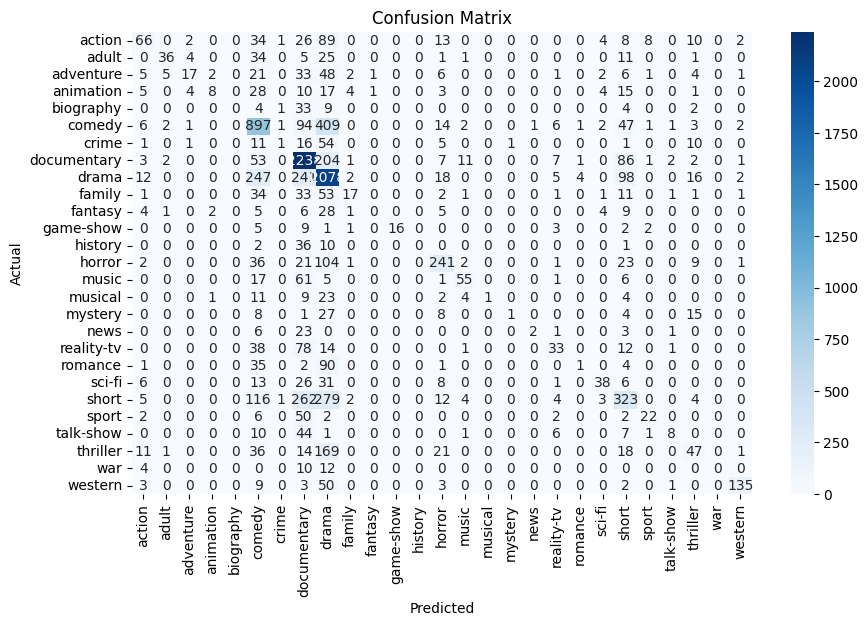

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Predict on Test Data

In [ ]:
def load_test_data(path):

    data = []

    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split(" ::: ")
            if len(parts) == 3:
                data.append({
                    "id": parts[0],
                    "title": parts[1],
                    "description": parts[2]
                })

    return pd.DataFrame(data)


In [ ]:
 test_path = "/content/movie_genre_data/Genre Classification Dataset/test_data.txt"

 test_df = load_test_data(test_path)

 test_tfidf = vectorizer.transform(test_df['description'])

 test_df['predicted_genre'] = model.predict(test_tfidf)

 print(test_df[['title', 'predicted_genre']].head())


                         title predicted_genre
0         Edgar's Lunch (1998)           drama
1     La guerra de papá (1977)           drama
2  Off the Beaten Track (2010)     documentary
3       Meu Amigo Hindu (2015)           drama
4            Er nu zhai (1955)           drama
